# Excel guardar multiples hojas

In [1]:
import pandas as pd
import yfinance as yf

df1 = yf.download('GGAL')
df2 = yf.download('BBAR')

with pd.ExcelWriter('excel_multihojas.xlsx') as contexto:  
    df1.to_excel(contexto, sheet_name='GGAL')
    df2.to_excel(contexto, sheet_name='BBAR')


[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


# Alligator

In [2]:
import yfinance as yf

df = yf.download('AAPL', start='2015-01-01', auto_adjust='true')
df['precio_m'] = (df['High']+df['Low'])/2
df['Jaw'] = df['precio_m'].ewm(alpha=1/13).mean().shift(8)
df['Teeth'] = df['precio_m'].ewm(alpha=1/8).mean().shift(5)
df['Lips'] = df['precio_m'].ewm(alpha=1/5).mean().shift(3)
df = df.dropna().round(2)
df

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Volume,precio_m,Jaw,Teeth,Lips
Date,,,,,,,,,
2015-01-14,99.50,100.82,99.01,100.19,48956600,99.92,99.82,97.98,99.63
2015-01-15,100.38,100.43,97.33,97.48,60014000,98.88,98.70,98.69,99.99
2015-01-16,97.67,98.17,96.00,96.72,78513300,97.08,98.00,99.43,100.27
2015-01-20,98.41,99.44,97.18,99.21,49899900,98.31,98.02,99.76,100.19
2015-01-21,99.42,101.34,98.80,99.97,48575900,100.07,98.66,100.03,99.89
...,...,...,...,...,...,...,...,...,...
2020-08-24,514.79,515.14,495.75,503.43,86484400,505.44,408.12,434.76,452.47
2020-08-25,498.79,500.72,492.21,499.30,52873900,496.46,412.10,437.92,455.63
2020-08-26,504.72,507.97,500.33,506.09,40755600,504.15,415.49,441.37,462.15


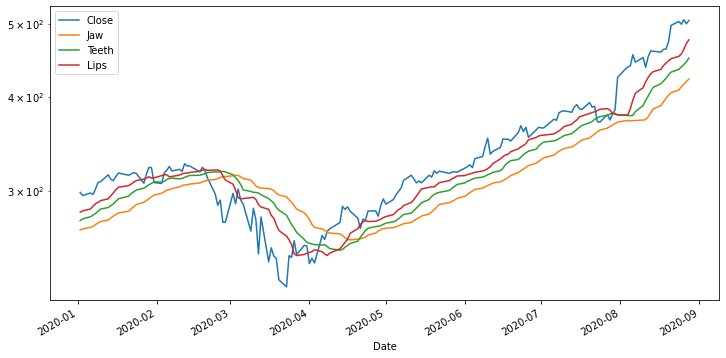

In [3]:
df.loc[df.index>'2020',['Close','Jaw','Teeth','Lips']].plot(logy=True, figsize=(12,6))

# Parámetros Estadísticos

In [4]:
df = yf.download('AAPL', auto_adjust='true', start='2001-01-01')
df['variacion'] = df.Close.pct_change()*100

volatilidad = df.variacion.groupby(df.index.year).std() * 250**0.5
skew = df.variacion.groupby(df.index.year).skew()
kurtosis= df.variacion.groupby(df.index.year).apply(pd.DataFrame.kurtosis)

parametros = pd.concat([volatilidad,skew,kurtosis], axis=1)
parametros.columns = ['volatilidad','skew','kurtosis']

parametros = parametros.dropna().round(2)
parametros

[*********************100%***********************]  1 of 1 downloaded


,volatilidad,skew,kurtosis
Date,,,
2001,62.26,0.15,1.60
2002,48.58,-0.30,2.48
2003,37.73,0.39,2.39
2004,40.63,1.31,4.50
2005,38.90,-0.02,1.42
2006,38.30,0.84,2.56
2007,37.59,0.06,2.17
2008,57.99,-0.16,2.79
2009,33.77,0.29,0.58


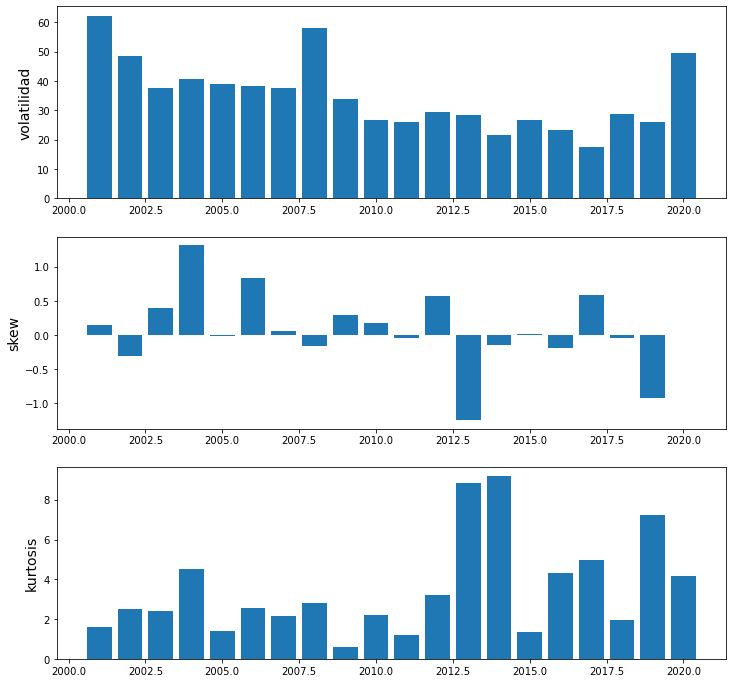

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12), nrows=3)

claves = ['volatilidad','skew','kurtosis']
for i in range(len(claves)):
    ax[i].bar(parametros.index, parametros[claves[i]])
    ax[i].set_ylabel(claves[i], fontsize=14)

plt.show()

## Independencia Kurtosis/Volatilidad

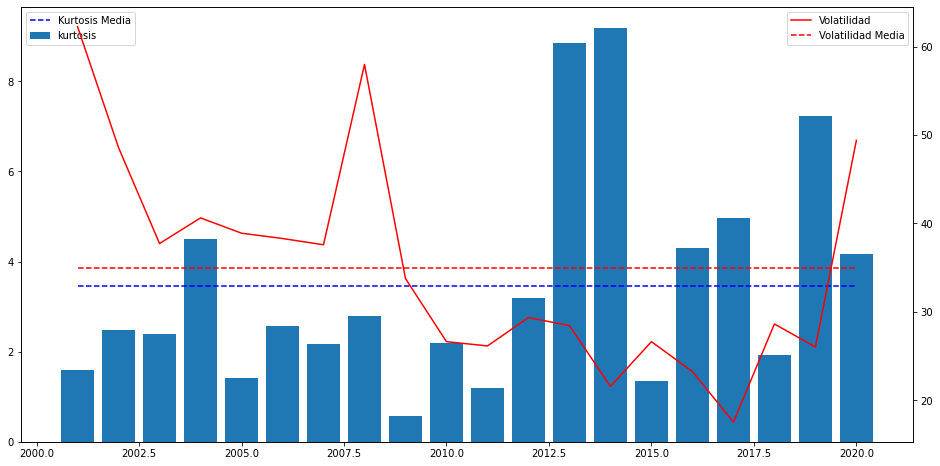

In [6]:
fig, ax = plt.subplots(figsize=(16,8))

ax.bar(parametros.index, parametros['kurtosis'], label='kurtosis')
ax.plot(parametros.index, [parametros['kurtosis'].mean()]*len(parametros), 'b--', label='Kurtosis Media')
ax2 = ax.twinx()
ax2.plot(parametros['volatilidad'], color='red', label='Volatilidad')
ax2.plot(parametros.index, [parametros['volatilidad'].mean()]*len(parametros), 'r--', label='Volatilidad Media')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

## En un rolling view

In [11]:
df = yf.download('AAPL', auto_adjust='true', start='2001-01-01')
df['variacion'] = df.Close.pct_change()*100

n=250
df['roll_vol'] = df.variacion.rolling(n).std() * 250**0.5
df['roll_kurt'] = df.variacion.rolling(n).apply(pd.DataFrame.kurtosis) 
df = df.dropna().round(2)
df

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Volume,variacion,roll_vol,roll_kurt
Date,,,,,,,,
2002-01-04,1.44,1.48,1.42,1.46,102494000,0.00,62.23,1.57
2002-01-07,1.46,1.48,1.40,1.41,111146000,-3.42,61.60,1.63
2002-01-08,1.40,1.42,1.39,1.40,112509600,-0.71,61.49,1.66
2002-01-09,1.41,1.42,1.31,1.34,81958800,-4.29,61.52,1.65
2002-01-10,1.31,1.32,1.25,1.31,113184400,-2.24,61.57,1.64
...,...,...,...,...,...,...,...,...
2020-08-24,514.79,515.14,495.75,503.43,86484400,1.20,41.71,6.37
2020-08-25,498.79,500.72,492.21,499.30,52873900,-0.82,41.73,6.35
2020-08-26,504.72,507.97,500.33,506.09,40755600,1.36,41.72,6.36


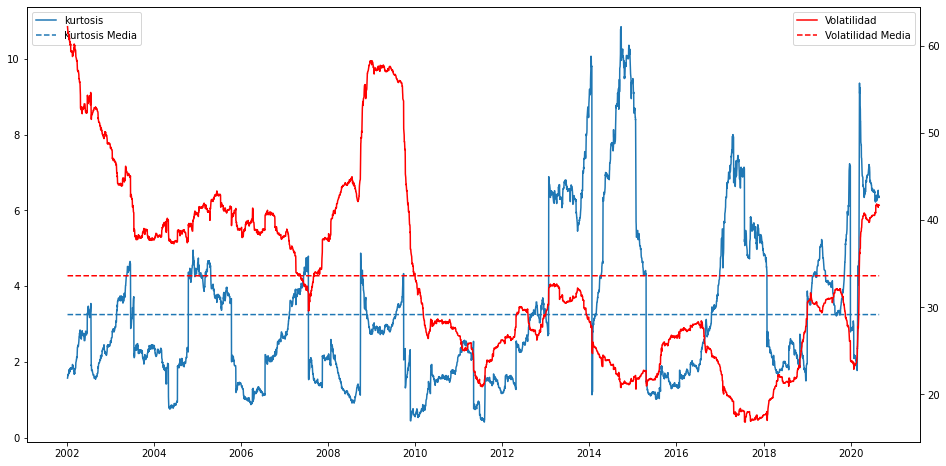

In [12]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df['roll_kurt'], c='tab:blue', label='kurtosis')
ax.plot(df.index, [df['roll_kurt'].mean()]*len(df), c='tab:blue', ls='--', label='Kurtosis Media')
ax2 = ax.twinx()
ax2.plot(df['roll_vol'], color='red', label='Volatilidad')
ax2.plot(df.index, [df['roll_vol'].mean()]*len(df), 'r--', label='Volatilidad Media')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

## El skew

In [13]:
df = yf.download('AAPL', auto_adjust='true', start='2001-01-01')
df['variacion'] = df.Close.pct_change()*100

n = 250
df['roll_skew'] = df.variacion.rolling(n).apply(pd.DataFrame.skew)
df = df.dropna().round(2)
df

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Volume,variacion,roll_skew
Date,,,,,,,
2002-01-04,1.44,1.48,1.42,1.46,102494000,0.00,0.14
2002-01-07,1.46,1.48,1.40,1.41,111146000,-3.42,0.13
2002-01-08,1.40,1.42,1.39,1.40,112509600,-0.71,0.14
2002-01-09,1.41,1.42,1.31,1.34,81958800,-4.29,0.14
2002-01-10,1.31,1.32,1.25,1.31,113184400,-2.24,0.15
...,...,...,...,...,...,...,...
2020-08-24,514.79,515.14,495.75,503.43,86484400,1.20,-0.02
2020-08-25,498.79,500.72,492.21,499.30,52873900,-0.82,-0.01
2020-08-26,504.72,507.97,500.33,506.09,40755600,1.36,-0.01


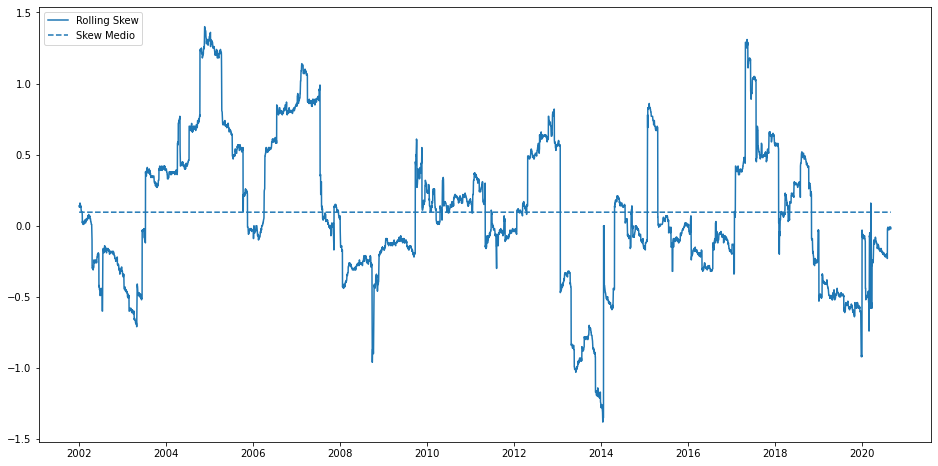

In [14]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df['roll_skew'], c='tab:blue', label='Rolling Skew')
ax.plot(df.index, [df['roll_skew'].mean()]*len(df), c='tab:blue', ls='--', label='Skew Medio')
ax.legend(loc='upper left')
plt.show()

## El skew, la distribucion, la media y mediana

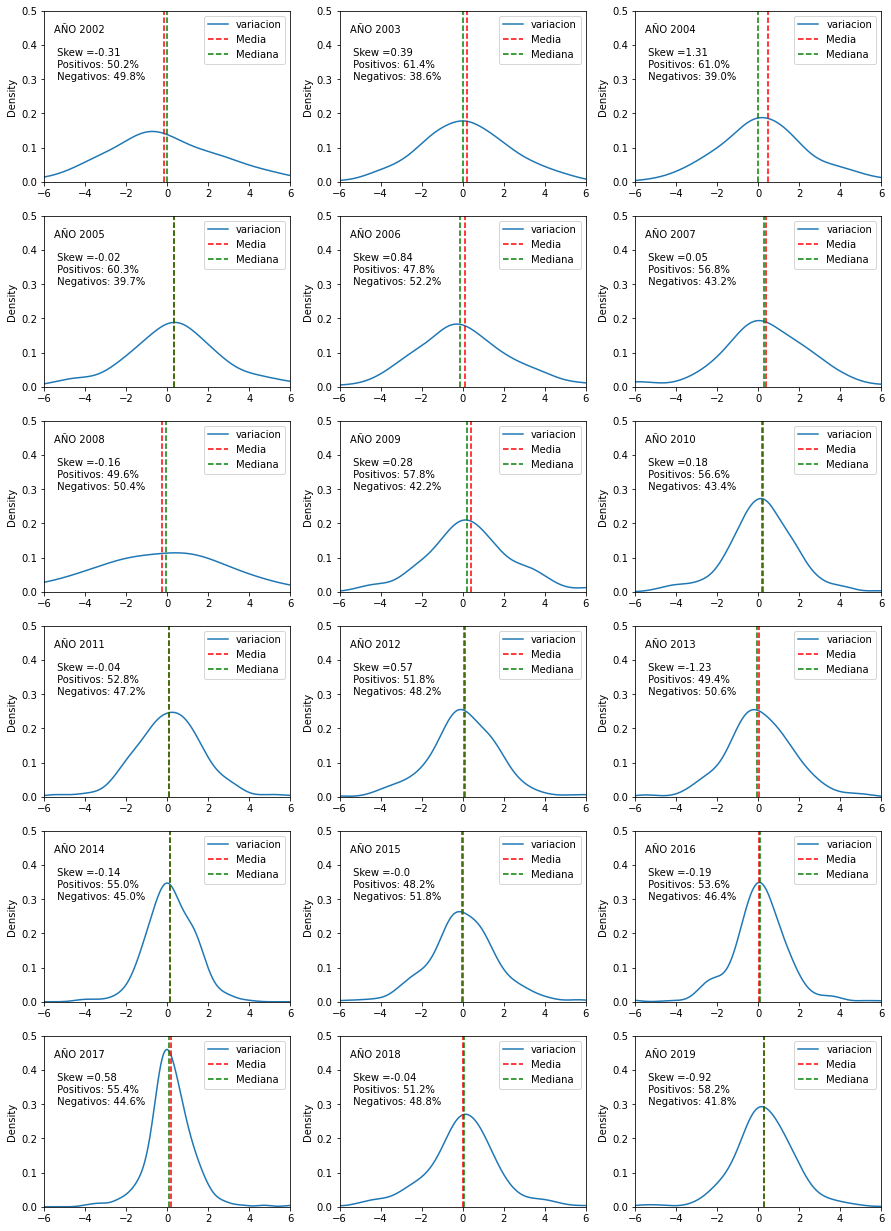

In [15]:
import datetime as dt
import matplotlib.pyplot as plt

filas= 6
columnas = 3
fig, ax = plt.subplots(figsize=(15,22), ncols=columnas, nrows=filas)

for año in range(2002,2020):
    row = (año-2002)//columnas
    col = (año-2002)%columnas
    filtro = df.loc[(df.index > dt.datetime(año,1,1))  & (df.index < dt.datetime(año,12,31))]
    ax[row][col] = filtro.variacion.plot(kind='kde', xlim=(-6,6), ylim=(0,0.5), ax=ax[row][col])
    ax[row][col].axvline(x=filtro.variacion.mean(), color='r', ls='--', label='Media')
    ax[row][col].axvline(x=filtro.variacion.median(), color='g', ls='--', label='Mediana')
    
    positivos = round(filtro.loc[filtro.variacion >= 0].variacion.count() / len(filtro) *100,1)
    negativos = round(filtro.loc[filtro.variacion < 0].variacion.count() / len(filtro) *100,1)
    skew = round(filtro.variacion.skew(),2)
    leyenda = 'AÑO '+str(año)+'\n\n Skew ='+str(skew)+'\n Positivos: '+str(positivos)+'%\n Negativos: '+str(negativos)+'%'
    ax[row][col].text(s = leyenda, y=0.3, x=-5.5)
    ax[row][col].legend(fontsize=10, loc='upper right')
plt.show()

## La Kurtosis

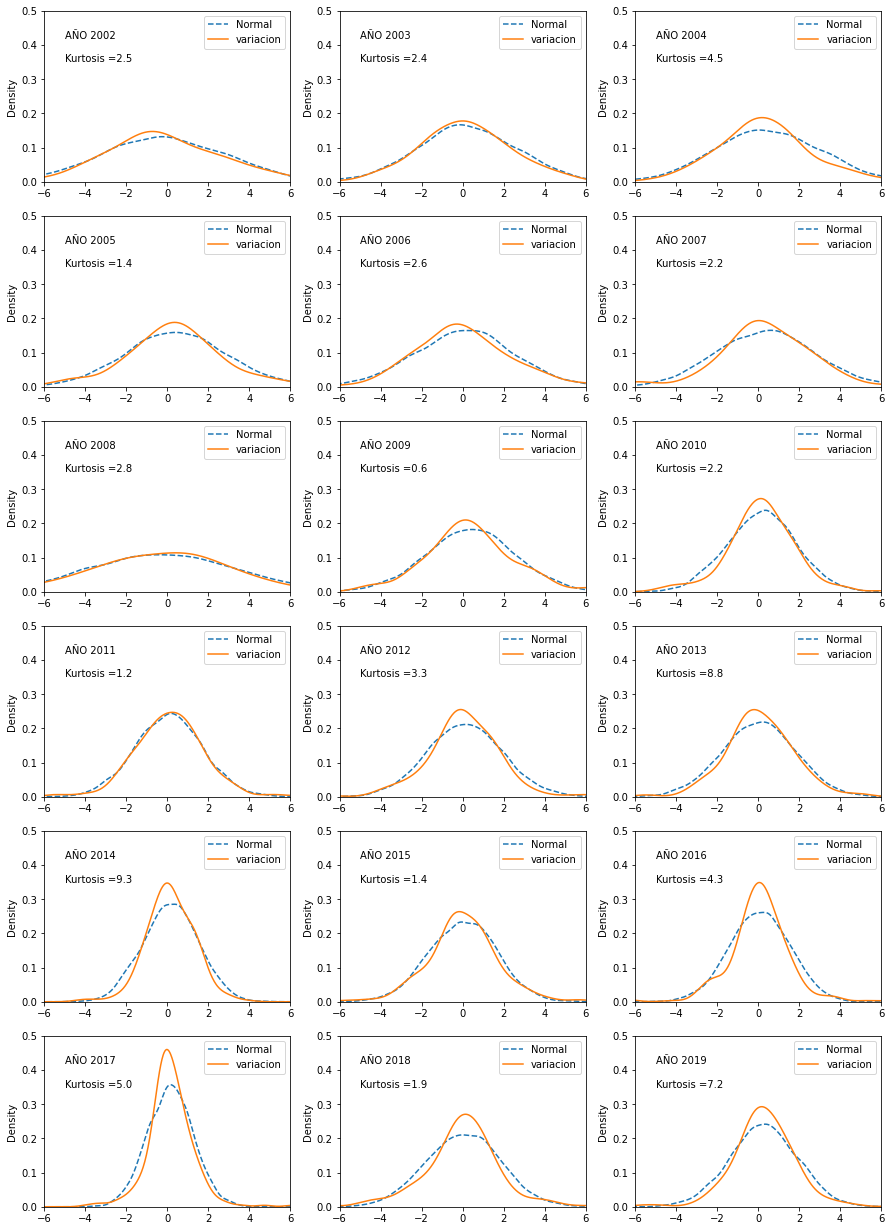

In [16]:
from scipy import stats

filas= 6
columnas = 3
fig, ax = plt.subplots(figsize=(15,22), ncols=columnas, nrows=filas)

for año in range(2002,2020):
    row = (año-2002)//columnas
    col = (año-2002)%columnas
    
    filtro = df.loc[(df.index > dt.datetime(año,1,1))  & (df.index < dt.datetime(año,12,31))]
    
    normal = stats.norm.rvs(filtro.variacion.mean(),filtro.variacion.std(),5000)
    normal_df = pd.DataFrame(normal)
    normal_df.columns = ['Normal']
    
    ax[row][col] = normal_df.plot(kind='kde', ls='--', xlim=(-6,6), ylim=(0,0.5), ax=ax[row][col])
    ax[row][col] = filtro.variacion.plot(kind='kde', xlim=(-6,6), ylim=(0,0.5), ax=ax[row][col])
    ax[row][col].text(s = 'AÑO '+str(año)+'\n\nKurtosis ='+str(round(filtro.variacion.kurtosis(),1)), y=0.35, x=-5)
    ax[row][col].legend(fontsize=10, loc='upper right')
plt.show()

In [17]:
import requests, pandas as pd

top50 = ['AAPL', 'AMZN', 'MSFT', 'BA', 'FB', 'NVDA', 'AMD', 'NFLX', 'GOOGL', 'GOOG', 'JPM', 'V', 'DIS',
         'BAC', 'INTC','MA', 'UAL', 'C', 'CRM', 'UNH', 'XOM', 'T', 'MU', 'WFC', 'JNJ', 'ADBE', 'PYPL',
         'HD', 'GILD', 'WMT', 'CSCO','PG', 'PFE', 'DAL', 'VZ', 'CVX', 'AAL', 'CMCSA', 'COST', 'QCOM',
         'BKNG', 'MRK', 'ABBV', 'BMY', 'KO', 'SBUX','MCD', 'RCL', 'AVGO', 'GS']

def getDataM(listado, start='2000-01-01', interval='1d', end=None):
    data = yf.download(listado, start=start, end=end, interval=interval, auto_adjust=True)
    return data.swaplevel(i=1, j=0, axis=1)

data_top = getDataM(top50, start='2020-01-01')

[*********************100%***********************]  50 of 50 downloaded


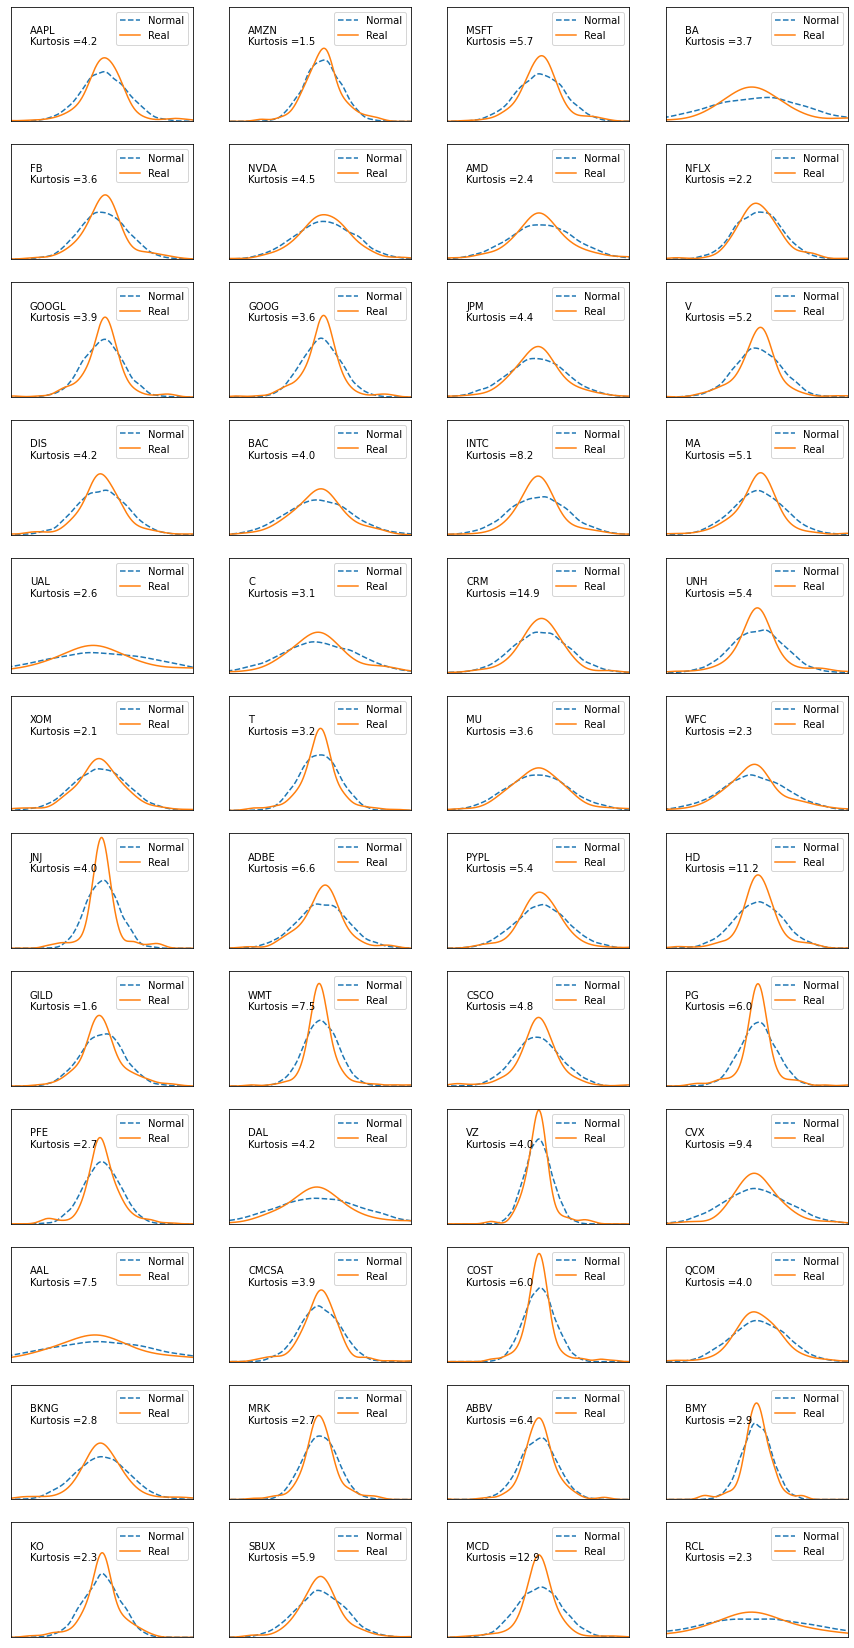

In [18]:
from scipy import stats

filas= 12
columnas = 4
fig, ax = plt.subplots(figsize=(15,30), ncols=columnas, nrows=filas)

for i in range(48):
    df = data_top[top50[i]].copy()
    df['variacion'] = df.Close.pct_change()*100
    row = (i)//columnas
    col = (i)%columnas
    
    normal = stats.norm.rvs(df.variacion.mean(),df.variacion.std(),5000)
    normal_df = pd.DataFrame(normal)
    normal_df.columns = ['Normal']
    
    ax[row][col] = normal_df.plot(kind='kde', ls='--', xlim=(-12,12), ylim=(0,0.3), ax=ax[row][col])
    ax[row][col] = df.variacion.plot(kind='kde', xlim=(-12,12), ylim=(0,0.3), ax=ax[row][col], label='Real')
    ax[row][col].text(s = top50[i]+'\nKurtosis ='+str(round(df.variacion.kurtosis(),1)), y=0.2, x=-9.5)
    ax[row][col].legend(fontsize=10, loc='upper right')
    ax[row][col].set_ylabel('')
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)
    
plt.show()

In [19]:
data_top = getDataM(top50, start='2016-01-01')

[*********************100%***********************]  50 of 50 downloaded


KDE stocks mas operados sp500 vista de la curtosis en extremos de la dist. 2015-2020
Línea gris: Modelado normal con sigma y mu de la distr. real. Línea Azul: Distr real


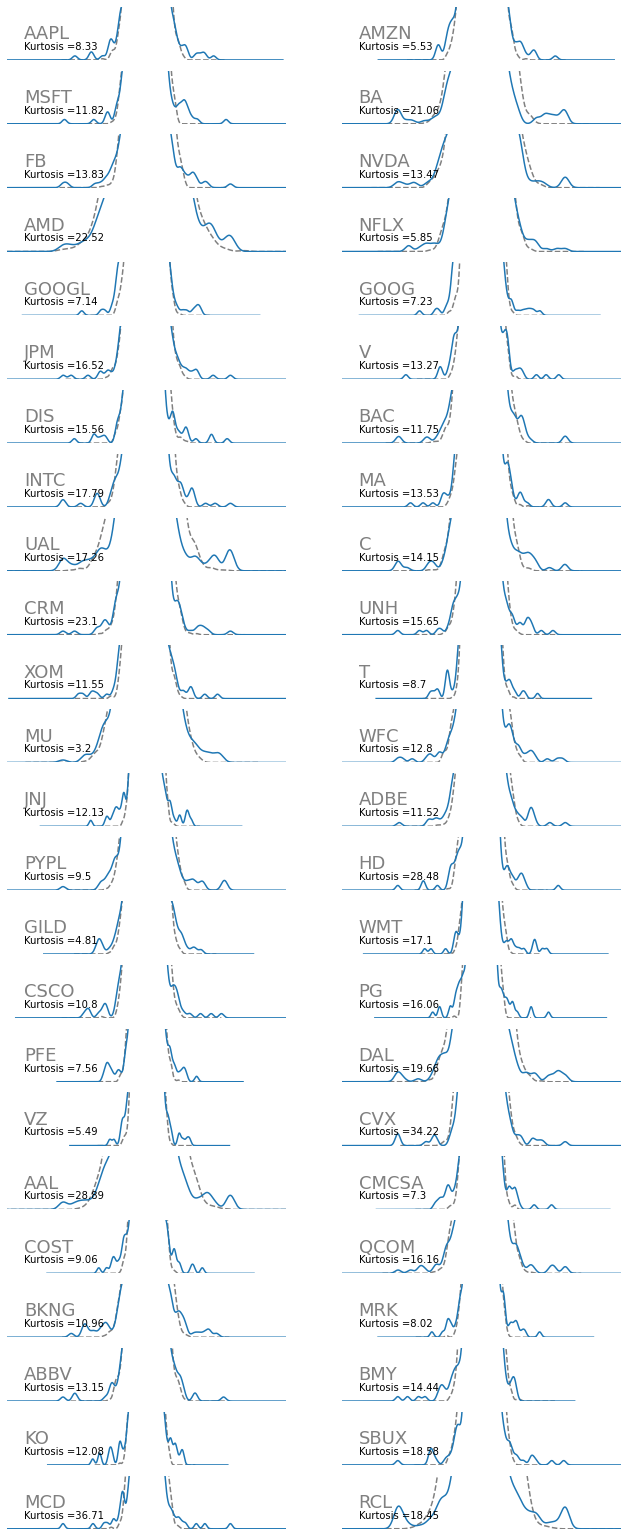

In [20]:
filas= 24
columnas = 2
fig, ax = plt.subplots(figsize=(11,28), ncols=columnas, nrows=filas)

for i in range(48):
    df = data_top[top50[i]].copy()
    df['variacion'] = df.Close.pct_change()*100
    k = round(df.variacion.kurtosis(),2)
    row = (i)//columnas
    col = (i)%columnas
    
    normal = stats.norm.rvs(df.variacion.mean(),df.variacion.std(),5000)
    normal_df = pd.DataFrame(normal)
    
    ax[row][col] = normal_df.plot(kind='kde', c='gray', ls='--', xlim=(-15,15), ylim=(0,0.01), ax=ax[row][col], legend=False)
    df['variacion'] = df['variacion'].clip(-15,15)
    ax[row][col] = df.variacion.plot(kind='kde', xlim=(-25,25), ylim=(0,0.01), ax=ax[row][col], label='Real')
    ax[row][col].text(s = top50[i], fontsize=18, y=0.004, color='gray', x=-22)
    ax[row][col].text(s = '\nKurtosis ='+str(k), fontsize=10, y=0.002, x=-22)
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)
    ax[row][col].axis('off')

print('KDE stocks mas operados sp500 vista de la curtosis en extremos de la dist. 2015-2020')
print('Línea gris: Modelado normal con sigma y mu de la distr. real. Línea Azul: Distr real')
plt.show()

# Multi-Index

In [21]:
import pandas as pd

data = pd.read_excel('excels_csvs/AAPL.xlsx').set_index("timestamp").sort_index()

data['intradiario']  = data.close - data.open
data['cierre_previo']=data['close'].shift()
data['gap_positivo']=data.eval('open>cierre_previo')
data['vela_color'] = np.where(data.close > data.open,"Verde",'Roja')
agg = data.groupby(['gap_positivo','vela_color']).size()
agg

gap_positivo  vela_color
False         Roja          1063
              Verde         1154
True          Roja          1419
              Verde         1397
dtype: int64

## Verifico si es un multiindex o no

In [22]:
agg.index

MultiIndex([(False,  'Roja'),
            (False, 'Verde'),
            ( True,  'Roja'),
            ( True, 'Verde')],
           names=['gap_positivo', 'vela_color'])

## Busco elementos por orden (para iterar)

In [23]:
agg.reset_index().loc[0]

gap_positivo    False
vela_color       Roja
0                1063
Name: 0, dtype: object

## Busco un elemento por ubicacion nominada

In [24]:
agg[False,'Verde']

1154

## Rearmo dataframe sin multiindex

In [25]:
agg2 = agg.unstack()
agg2

vela_color,Roja,Verde
gap_positivo,,
False,1063,1154
True,1419,1397


In [26]:
agg2.index

Index([False, True], dtype='object', name='gap_positivo')

## Busco elemento por orden (sin multiindex)

In [27]:
agg2.iloc[0]

vela_color
Roja     1063
Verde    1154
dtype: int64

## Busco elemento por ubicacion noninada (sin multiindex)

In [28]:
agg2.loc[False,'Verde']

1154

## Rearmo DataFrame sin multiindex al reves

In [29]:
agg3 = agg.unstack(0)
agg3

gap_positivo,False,True
vela_color,,
Roja,1063,1419
Verde,1154,1397


In [30]:
agg3.loc['Verde',False]

1154

## Rearmo Serie como DataFrame 

In [31]:
agg4 = agg.to_frame(name='conteo')
agg4

conteo
gap_positivo vela_color        
False        Roja          1063
             Verde         1154
True         Roja          1419
             Verde         1397

In [33]:
agg4.loc[False,'Verde']

conteo    1154
Name: (False, Verde), dtype: int64

# Beta

In [34]:
n=250

df = yf.download('AAPL', auto_adjust='true', start='2001-01-01')
df['variacion'] = df.Close.pct_change()*100

spy = yf.download('SPY', auto_adjust='true', start='2001-01-01')
spy['variacion'] = spy.Close.pct_change()*100
spy['roll_var'] = spy.variacion.rolling(n).var() 

df['roll_vol'] = df.variacion.rolling(n).std() * 250**0.5
df['roll_kurt'] = df.variacion.rolling(n).apply(pd.DataFrame.kurtosis) 
df['roll_beta'] = df.variacion.rolling(n).corr(spy['variacion']) / spy['roll_var']
df.dropna(inplace=True)
df

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Volume,variacion,roll_vol,roll_kurt,roll_beta
Date,,,,,,,,,
2002-01-04,1.44,1.48,1.42,1.46,102494000,0.000000,62.229959,1.574388,0.280874
2002-01-07,1.46,1.48,1.40,1.41,111146000,-3.424658,61.599529,1.628492,0.287203
2002-01-08,1.40,1.42,1.39,1.40,112509600,-0.709220,61.490902,1.660554,0.290403
2002-01-09,1.41,1.42,1.31,1.34,81958800,-4.285714,61.523837,1.653388,0.295805
2002-01-10,1.31,1.32,1.25,1.31,113184400,-2.238806,61.566307,1.642984,0.295249
...,...,...,...,...,...,...,...,...,...
2020-08-24,514.79,515.14,495.75,503.43,86484400,1.196028,41.711171,6.366496,0.208165
2020-08-25,498.79,500.72,492.21,499.30,52873900,-0.820372,41.728099,6.351284,0.208087
2020-08-26,504.72,507.97,500.33,506.09,40755600,1.359904,41.718948,6.359327,0.208185


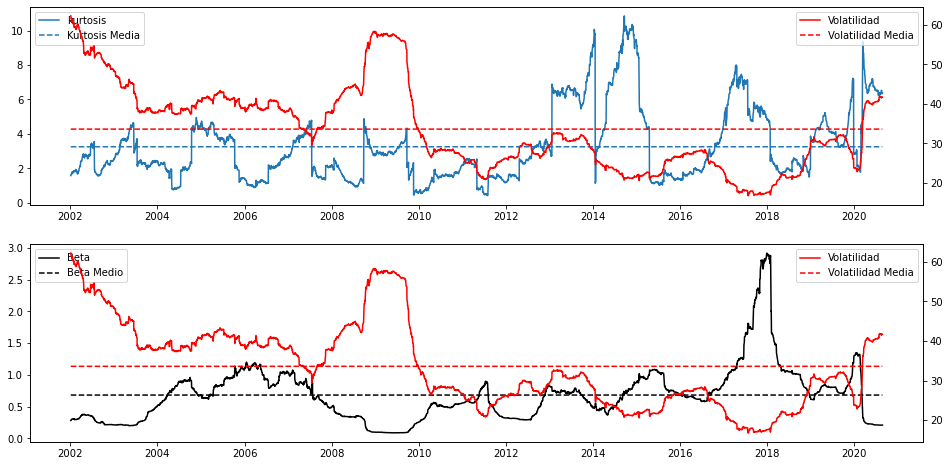

In [35]:
fig, ax = plt.subplots(figsize=(16,8), nrows=2)

ax[0].plot(df['roll_kurt'], c='tab:blue', label='kurtosis')
ax[0].plot(df.index, [df['roll_kurt'].mean()]*len(df), c='tab:blue', ls='--', label='Kurtosis Media')
ax2 = ax[0].twinx()
ax2.plot(df['roll_vol'], color='red', label='Volatilidad')
ax2.plot(df.index, [df['roll_vol'].mean()]*len(df), 'r--', label='Volatilidad Media')

ax[0].legend(loc='upper left')
ax2.legend(loc='upper right')

ax[1].plot(df['roll_beta'], c='k', label='Beta')
ax[1].plot(df.index, [df['roll_beta'].mean()]*len(df), c='k', ls='--', label='Beta Medio')
ax3 = ax[1].twinx()
ax3.plot(df['roll_vol'], color='red', label='Volatilidad')
ax3.plot(df.index, [df['roll_vol'].mean()]*len(df), 'r--', label='Volatilidad Media')

ax[1].legend(loc='upper left')
ax3.legend(loc='upper right')

plt.show()



## Correlaciones Beta vs Kurtosis y Volatilidad

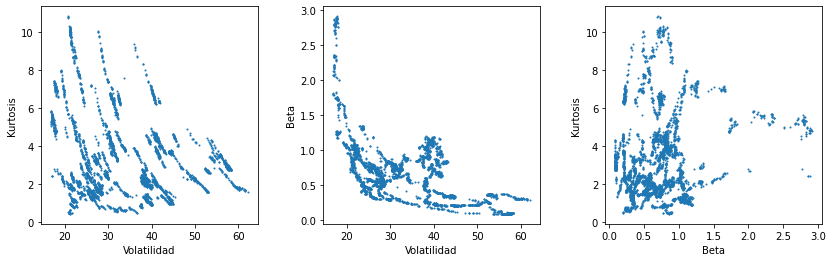

In [36]:
fig, ax = plt.subplots(figsize=(14,4), ncols=3)

ax[0].scatter(df['roll_vol'], df['roll_kurt'], s=1)
ax[0].set_xlabel('Volatilidad')
ax[0].set_ylabel('Kurtosis')

ax[1].scatter(df['roll_vol'], df['roll_beta'], s=1)
ax[1].set_xlabel('Volatilidad')
ax[1].set_ylabel('Beta')

ax[2].scatter(df['roll_beta'], df['roll_kurt'], s=1)
ax[2].set_xlabel('Beta')
ax[2].set_ylabel('Kurtosis')

fig.subplots_adjust(wspace= 0.30)
plt.show()